# 데이터 불러오기

In [1]:
import matplotlib as plt
plt.rc('axes', unicode_minus=False) # 마이너스 기호 깨짐 방지
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic') # 폰트 적용

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
DATA_PATH = "/content/drive/MyDrive/파이썬/00_mimi_project/"

In [19]:
train_trans = pd.read_csv(f"{DATA_PATH}store_train_transactions.csv") # 구매기록 학습데이터
test_trans = pd.read_csv(f"{DATA_PATH}store_test_transactions.csv") # 구매기록 테스트데이터

store_train = pd.read_csv(f"{DATA_PATH}store_train.csv") # 학습용 고객 ID 및 정답데이터
store_submission = pd.read_csv(f"{DATA_PATH}store_submission.csv") # 테스트용 고객 ID 데이터(제출파일 양식)


train_trans.shape , test_trans.shape, store_train.shape, store_submission.shape

((523105, 7), (441196, 7), (14940, 2), (12225, 2))

In [20]:
train_trans["구매일시"] = pd.to_datetime(train_trans["구매일시"])
test_trans["구매일시"] = pd.to_datetime(test_trans["구매일시"])

#==========================================

# EDA

## 공산품 (구매횟수에서 미혼/기혼의 차이가 큼)

In [21]:
train_trans = train_trans.merge(store_train,how = 'left',on = 'ID')

In [ ]:
tmp = train_trans[train_trans['대분류'] == '공산품']

In [ ]:
tmp.groupby('target')['중분류'].agg(lambda x : x.nunique())
# 공산품의 사는 종류도 미혼/기혼에 따라서 차이가 없음

target
0.0    29
1.0    28
Name: 중분류, dtype: int64

In [ ]:
# 결국 인당 공산품에 얼마의 돈을 쓰는지 확인해봐야함.
tmp[tmp['구매가격'] > 0].groupby('target')['구매가격'].agg('sum')

target
0.0    1295543861
1.0     345464538
Name: 구매가격, dtype: int64

In [ ]:
tmp[tmp['target'] == 1]['ID'].nunique()
# 기혼 중에서 순수하게 공산품을 산 사람은 2481명이다.

2481

In [ ]:
# 공산품 총 구매금액도 상당한 차이를 보임. 그러면 순수한 공산품을 구매한 사람을 추려보자
tmp[tmp['target'] == 0]['ID'].nunique()
# 미혼 중에서 순수하게 공산품을 산 사람은 4596명이다.

# 즉, 미혼의 경우에는 기혼에 비해 훨씬 더 많은 금액을 공산품에 지불함!

## 즉, 고객별로 공산품 구매 빈도와 구매합계액 그리고 구매 빈도를 나눠준다! (3개의 칼럼을 추출할 수 있는 것이다.)

### 미혼의 경우에는 구매빈도도 높고 공산품을 훨씬 더 높은 가격으로 구매,

### 기혼의 경우에는 구매빈도도 낮고 훨씬 더 낮은 가격으로 구매.

4596

## 공산품파트

In [ ]:
import seaborn as sns

In [ ]:
train_trans['구매한_달'] = train_trans['구매일시'].dt.month

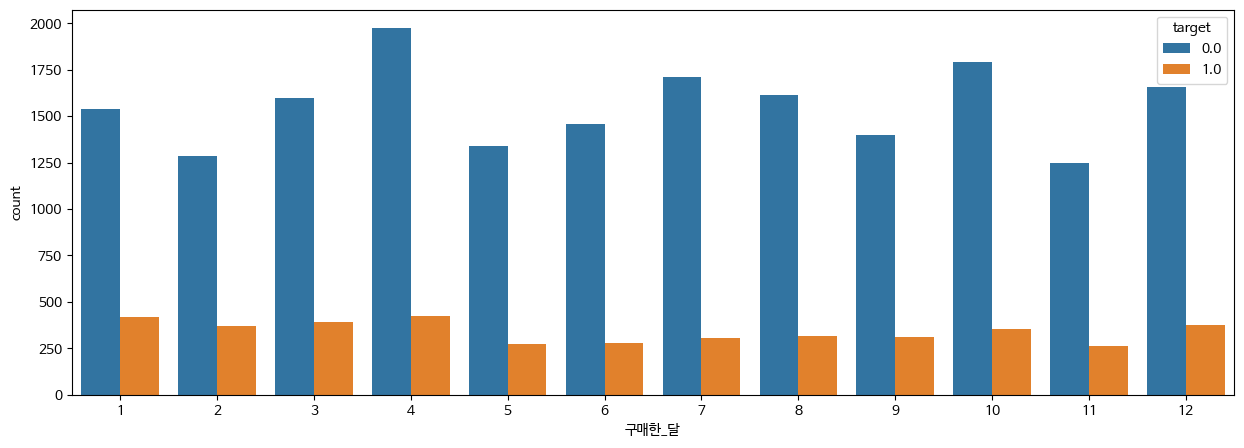

In [ ]:
tmp = train_trans[train_trans['대분류'] == '공산품파트']

fig,ax = plt.subplots(figsize = (15,5))
sns.countplot(data = tmp,x = '구매한_달',hue = 'target',ax = ax)
plt.show()
# 공산품파트 구매하는 달에는 크게 차이는 존재하지 않는 듯

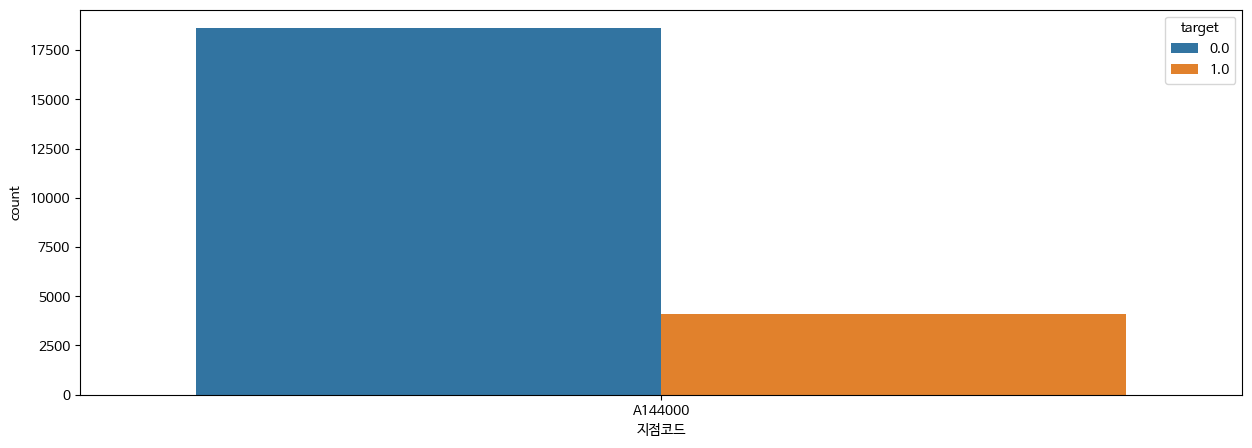

In [ ]:
# 공산품파트 어느 지점에서 많이 샀는지 확인

fig,ax = plt.subplots(figsize = (15,5))
sns.countplot(data = tmp,x = '지점코드',hue = 'target',ax = ax)
plt.show()

# 공산품파트를 한 지점에서만 구매했기 때문에 의미가 없다.

In [ ]:
tmp.groupby('target')['중분류'].agg(lambda x : x.nunique())
# 공산품파트의 종류의 갯수도 동일하

target
0.0    24
1.0    24
Name: 중분류, dtype: int64

In [ ]:
# 결국 인당 공산품파트에 얼마의 돈을 쓰는지 확인해봐야함.
tmp[tmp['구매가격'] > 0].groupby('target')['구매가격'].agg('sum')

target
0.0    786483535
1.0    143249400
Name: 구매가격, dtype: int64

In [ ]:
# 공산품 총 구매금액도 상당한 차이를 보임. 그러면 순수한 공산품을 구매한 사람을 추려보자
tmp[tmp['target'] == 0]['ID'].nunique()
# 미혼 중에서 순수하게 공산품파트를 산 사람은 2191명이다.

2191

In [ ]:
tmp[tmp['target'] == 1]['ID'].nunique()
# 기혼 중에서 순수하게 공산품파트를 산 사람은 935명이다.

935

In [ ]:
# 즉, 미혼은 기혼에 비해 상대적으로 공산품파트를 선호하며 그로 인해 많은 돈도 지불한다는 사실을 알 수 있다.

## 고객별로 공산품파트 구매금액의 합계와 구매빈도를 구하고 두 가지 사항을 나눠준다.

## 생식품

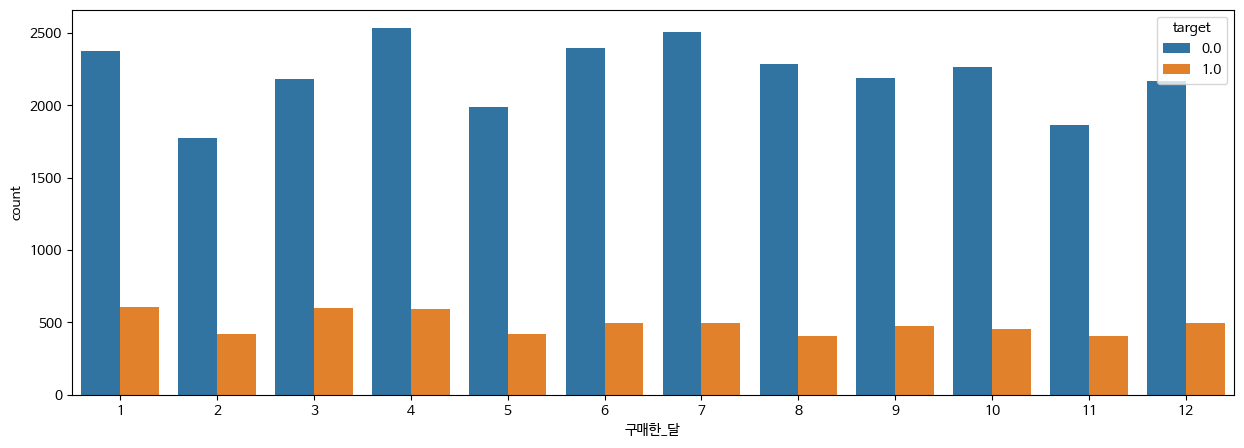

In [ ]:
tmp = train_trans[train_trans['대분류'] == '생식품']

fig,ax = plt.subplots(figsize = (15,5))
sns.countplot(data = tmp,x = '구매한_달',hue = 'target',ax = ax)
plt.show()

# 생식품을 구매한 달에는 크게 차이는 없다.

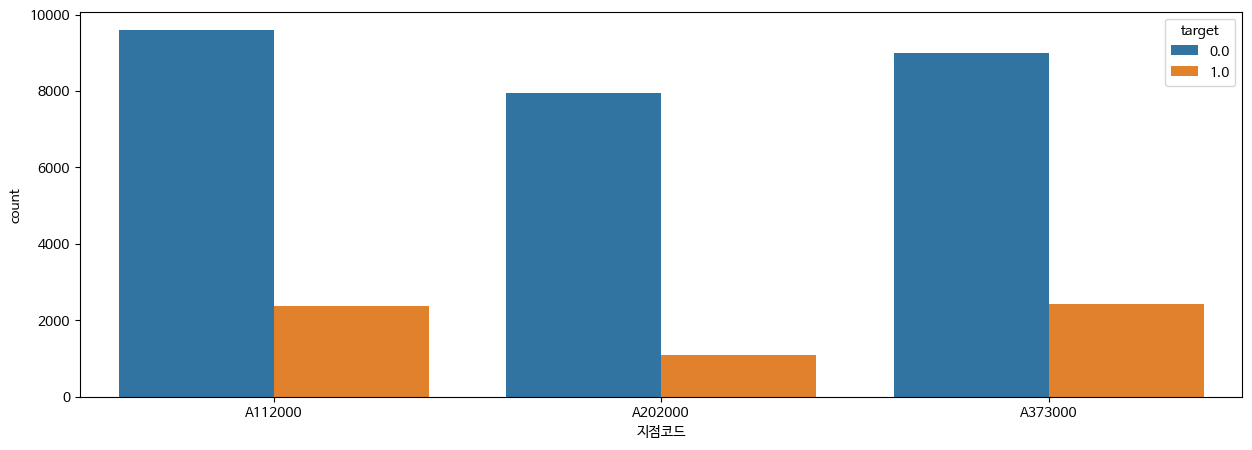

In [ ]:
fig,ax = plt.subplots(figsize = (15,5))
sns.countplot(data = tmp,x = '지점코드',hue = 'target',ax = ax)
plt.show()
# 지점별로 고르게 생식품을 구매하고 있다.

In [ ]:
tmp.groupby('target')['중분류'].agg(lambda x : x.nunique())

# 생식품의 중분류별 구매 종류의 개수도 유의미하지 않음

target
0.0    28
1.0    26
Name: 중분류, dtype: int64

In [ ]:
tmp[tmp['구매가격'] > 0].groupby('target')['구매가격'].agg('sum')

# 생식품의 총 구매가격의 합계도 크게 차이남

# 당연히 미혼이 훨씬 더 많이 구매를 했기 때문이다.

target
0.0    1303869673
1.0     271015157
Name: 구매가격, dtype: int64

In [ ]:
tmp[tmp['target'] == 0]['ID'].nunique()

# 미혼 중에서 순수하게 생식품을 산 사람의 수는 3799명이다.

3799

In [ ]:
tmp[tmp['target'] == 1]['ID'].nunique()

# 기혼 중에서 순수하게 공산품을 산 사람은 1430명이다.

1430

In [ ]:
# 생식품의 경우도 마찬가지로 미혼이 기혼에 비해 구매력이 훨씬 더 높다
## 미혼이 기혼에 비해 생식품의 구매 선호도가 높은 것은 지불하는 금액의 평균을 봐도 알 수 있음.
### 고객별로 생식품 구매금액의 합계와 구매빈도를 구하고 두 가지 사항을 나눠준다.

## 기혼/미혼별 총 대분류별 구매 횟수

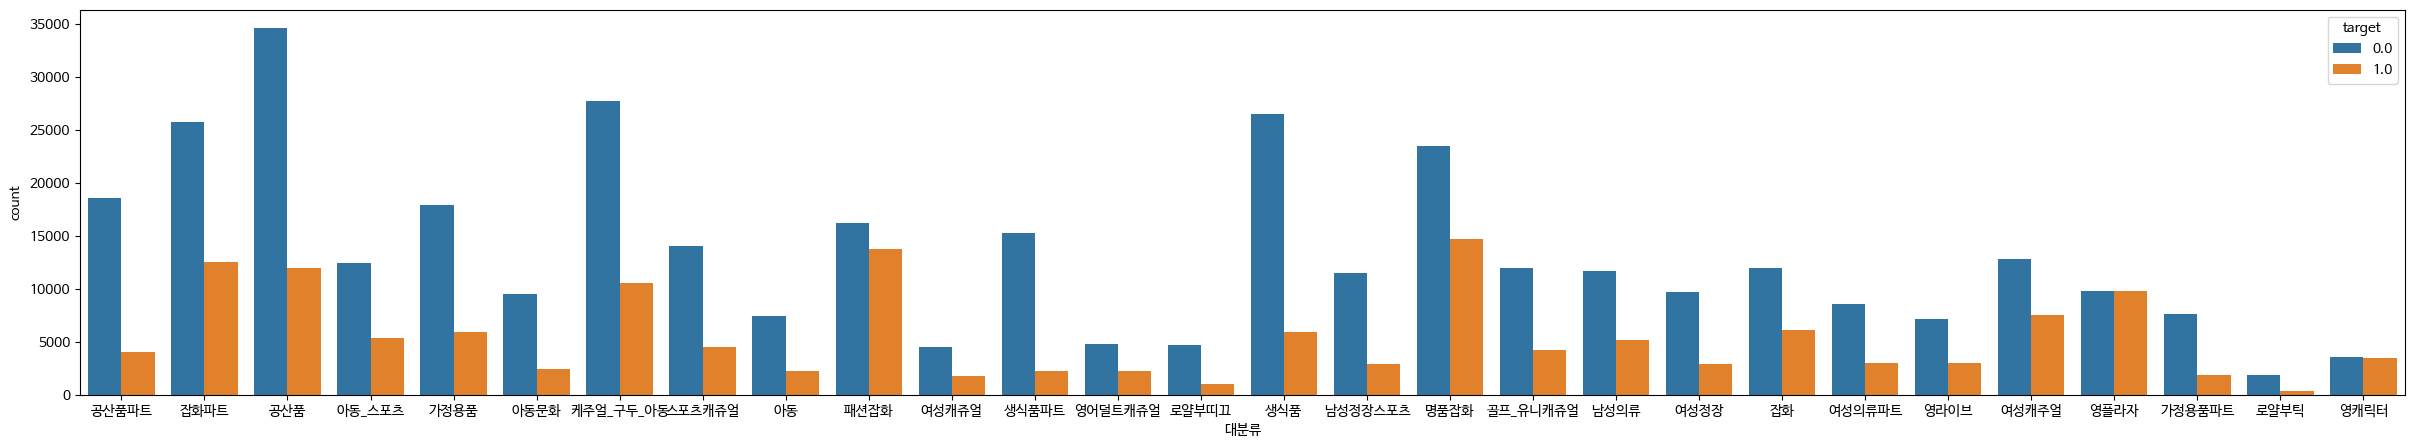

In [ ]:
fig,ax = plt.subplots(figsize = (30,5))
sns.countplot(x = '대분류',hue = 'target',data = train_trans,ax = ax)
plt.show()

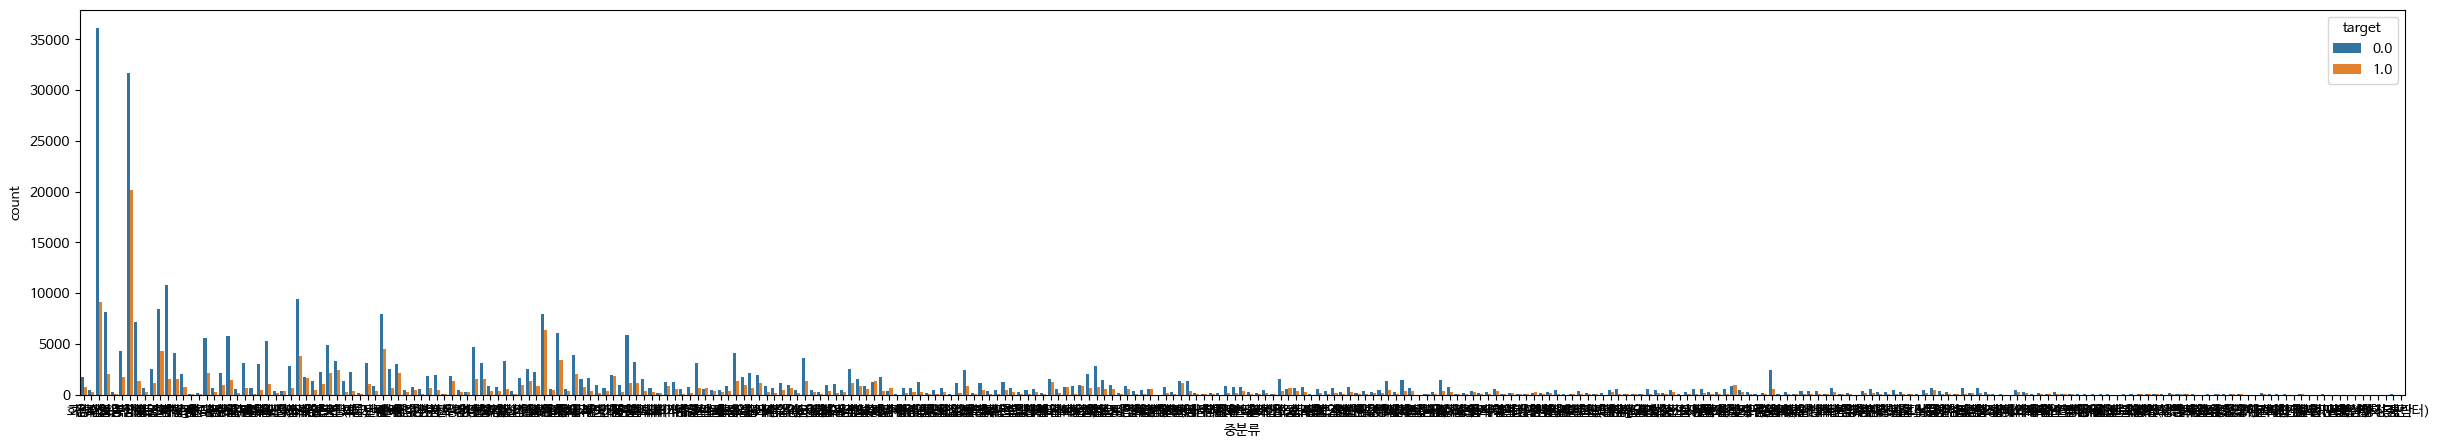

In [ ]:
fig,ax = plt.subplots(figsize = (30,5))
sns.countplot(x = '중분류',hue = 'target',data = train_trans,ax = ax)
plt.show()
## 이것을 본다는 것은 불가능

In [ ]:
middle_category_0 = train_trans[train_trans['target'] == 0].groupby('중분류').size()
middle_category_1 = train_trans[train_trans['target'] == 1].groupby('중분류').size()
tmp = middle_category_0 - middle_category_1
tmp_2 = tmp[(middle_category_0*0.3 - middle_category_1)>0].reset_index()

In [ ]:
tmp_2['중분류'].to_list()

['GBR  지원',
 'TV.VTR',
 'TV_VTR',
 '가스렌지',
 '가전특정',
 '건강용품',
 '건식품',
 '건어물',
 '곡물',
 '골프(LC)',
 '골프(NB)',
 '골프(국내)',
 '골프(단품)',
 '골프(수입)',
 '골프(용품)',
 '골프단품',
 '골프웨어',
 '과자',
 '교복행사',
 '국내부띠끄',
 '기타식품',
 '내셔날',
 '내셔널',
 '냉난방',
 '냉동식품',
 '냉장고_세탁기',
 '냉장식품',
 '니트',
 '단품(트래디셔널)',
 '단품행사',
 '디자이너니트',
 '디자이너부띠끄',
 '디자이너숍',
 '디자이너캐릭터',
 '라디오.카세트',
 '라이센스',
 '레이디숍A',
 '레포츠',
 '레포츠단품',
 '로얄부틱2F',
 '로얄수입행사',
 '마춤',
 '면류',
 '모피.피혁',
 '모피_피혁',
 '문구',
 '문화',
 '부띠끄',
 '부띠끄행사',
 '상품개발지원',
 '생선',
 '세탁기_냉장고',
 '소파',
 '소형가구(가구)',
 '쇼파',
 '수예',
 '수예침장',
 '수예행사',
 '수입_종합가구',
 '수입구두',
 '수입도자기',
 '수입부띠끄',
 '수입슈즈',
 '수입캐주얼',
 '수입피혁',
 '슈즈',
 '스포츠단품',
 '아동',
 '아동단품',
 '아동복',
 '아동잡화',
 '아동특선',
 '야채',
 '엘레강스',
 '엘레강스부틱',
 '완구',
 '용기보증',
 '용품',
 '원목(주니어)',
 '유아',
 '음료',
 '의류기타',
 '인스탄트식품',
 '임대골프',
 '잡화토탈',
 '전문가구(가구)',
 '전화기',
 '정육',
 '조명',
 '조미료',
 '종합_수입',
 '주방용품',
 '지갑_벨트',
 '직수입침구',
 '청과',
 '침구',
 '침대',
 '카세트_전화기',
 '카페트',
 '카페트_대자리',
 '캐쥬얼단품',
 '크리스탈',
 '타운',
 '타운단품',
 '통병조림',
 '통판',
 '트래디셔널캐쥬얼',
 '특선행사',

### 고객별 구매 횟수

In [ ]:
train_trans.groupby('ID')["구매일시"].agg(lambda x : x.dt.date.nunique()).reset_index()

,ID,구매일시
0,train_0,11
1,train_1,21
2,train_10,44
3,train_100,14
4,train_1000,22
...,...,...
14935,train_9995,1
14936,train_9996,15
14937,train_9997,15
14938,train_9998,13


## 구매가격 분포도

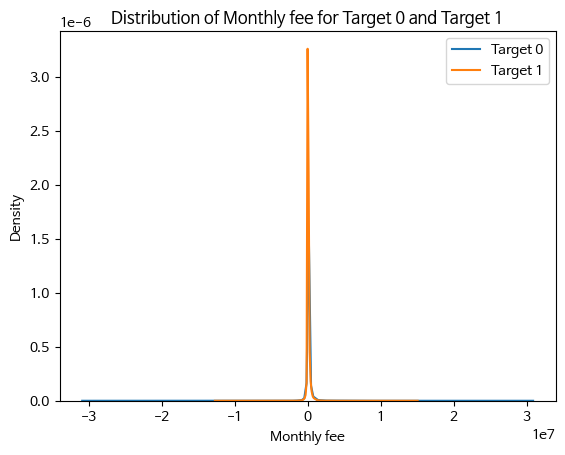

In [ ]:
# 'target' 열을 기준으로 데이터를 나누기
df_target_0 = train_trans[train_trans['target'] == 0]
df_target_1 = train_trans[train_trans['target'] == 1]

# 각각의 분포를 kdeplot으로 시각화
sns.kdeplot(df_target_0['구매가격'], label='Target 0')
sns.kdeplot(df_target_1['구매가격'], label='Target 1')

# 그래프에 레이블 추가
plt.xlabel('Monthly fee')
plt.ylabel('Density')
plt.title('Distribution of Monthly fee for Target 0 and Target 1')

# 범례 추가
plt.legend()

# 그래프 표시
plt.show()

## 이것만 봤을 때는 구매가격의 분포에는 크게 차이가 없는 것 같음

In [8]:
## 구매가격 분위수 및 이상치 건수
q1, q3 = train_trans["구매가격"].quantile([0.25,0.75])
iqr = q3 - q1
w = 1.5
box_min = q1 - iqr * w
box_max = q3 + iqr * w
box_min, box_max

(-123250.0, 265470.0)

In [30]:
q1, q3 = train_trans["구매가격"].quantile([0.25,0.75])
iqr = q3 - q1
w = 1.5
box_min = q1 - iqr * w
box_max = q3 + iqr * w
box_min, box_max

def boxplot(x):
  if box_min < x < q1:
    return 0
  elif q1 < x < q3:
    return 1
  elif q3 < x < box_max:
    return 2
  else:
    return 3

In [32]:
train_trans['구매가격_분리'] = train_trans['구매가격'].apply(boxplot)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

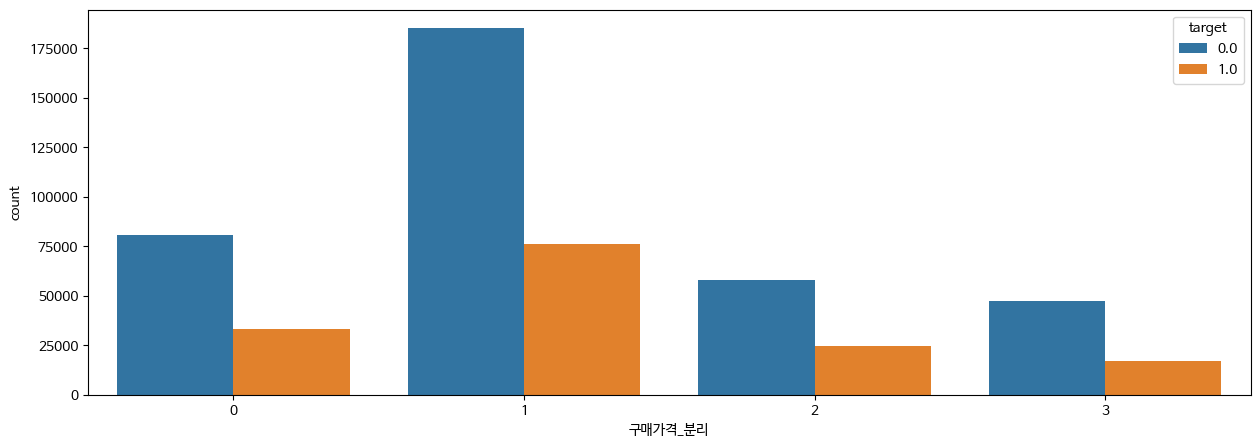

In [33]:
fig,ax = plt.subplots(figsize = (15,5))
sns.countplot(data = train_trans,x= '구매가격_분리',hue = 'target',ax = ax)
plt.show()

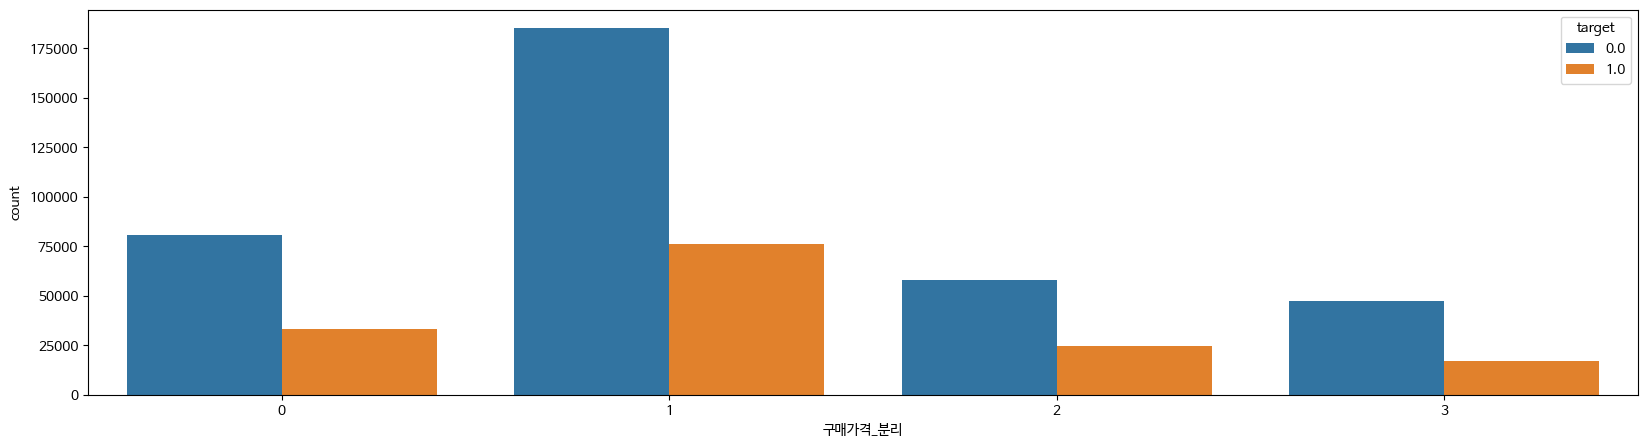

In [ ]:
fig,ax = plt.subplots(figsize = (20,5))
sns.countplot(x = '구매가격_분리',hue = 'target',data = train_trans,ax = ax)
plt.show()

## 미혼/기혼별 환불 금액

In [ ]:
train_trans[train_trans['구매가격'] < 0].groupby('target').size()

target
0.0    25361
1.0     9863
dtype: int64

## 지점별 방문 횟수

<function matplotlib.pyplot.show(close=None, block=None)>

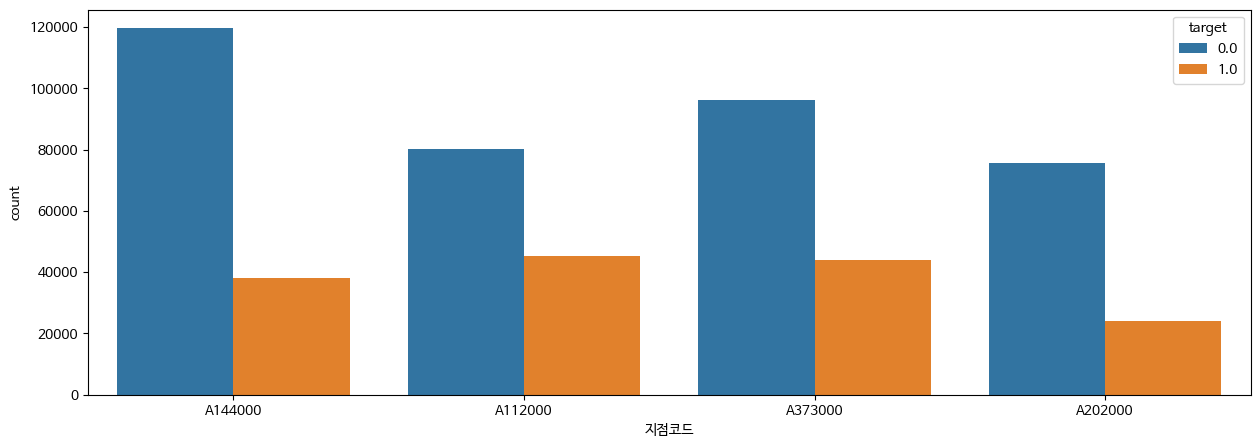

In [ ]:
fig,ax = plt.subplots(figsize = (15,5))
sns.countplot(data=train_trans,x = '지점코드',hue = 'target',ax = ax)
plt.show

In [ ]:
train_trans.groupby('ID')['구매일시'].agg(lambda x : x.max)

ID
train_0       <bound method NDFrame._add_numeric_operations....
train_1       <bound method NDFrame._add_numeric_operations....
train_10      <bound method NDFrame._add_numeric_operations....
train_100     <bound method NDFrame._add_numeric_operations....
train_1000    <bound method NDFrame._add_numeric_operations....
                                    ...                        
train_9995    <bound method NDFrame._add_numeric_operations....
train_9996    <bound method NDFrame._add_numeric_operations....
train_9997    <bound method NDFrame._add_numeric_operations....
train_9998    <bound method NDFrame._add_numeric_operations....
train_9999    <bound method NDFrame._add_numeric_operations....
Name: 구매일시, Length: 14940, dtype: object

In [ ]:
agg_list = [
        ('구매주기',lambda x : ( x.max() - x.min() ).days / x.dt.date.nunique() ),
    ]

train_trans.groupby('ID')["구매일시"].agg(agg_list).reset_index()


,ID,구매주기
0,train_0,23.090909
1,train_1,16.714286
2,train_10,8.113636
3,train_100,18.142857
4,train_1000,13.818182
...,...,...
14935,train_9995,0.000000
14936,train_9996,8.866667
14937,train_9997,8.333333
14938,train_9998,7.076923


In [ ]:
tmp = train_trans[train_trans['중분류'].str.contains('의류')]

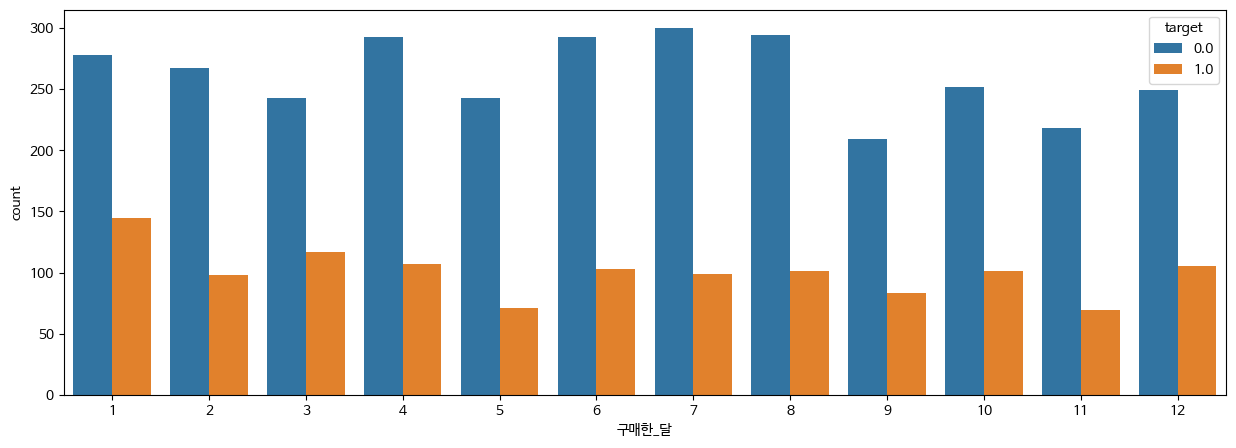

In [ ]:
fig,ax = plt.subplots(figsize = (15,5))
sns.countplot(data = tmp,x = '구매한_달',hue = 'target',ax = ax)
plt.show()

In [ ]:
train_trans['구매요일'] = train_trans['구매일시'].dt.dayofweek
train_trans

,ID,구매일시,지점코드,대분류,중분류,브랜드코드,구매가격,target,구매한_달,구매가격_분리,구매요일
0,train_13219,2004-05-01 09:40:00,A144000,공산품파트,차류,5100,59700,0.0,5,1,5
1,train_5590,2004-05-01 09:40:00,A144000,잡화파트,화장잡화,5101,17000,0.0,5,0,5
2,train_7200,2004-05-01 10:20:00,A112000,공산품,용기보증,5100,34937,0.0,5,1,5
3,train_3010,2004-05-01 10:30:00,A373000,아동_스포츠,아동복,5105,19000,0.0,5,0,5
4,train_10851,2004-05-01 10:30:00,A112000,가정용품,전화기_카세트,5110,215000,0.0,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...
523100,train_330,2005-04-29 19:53:00,A112000,영캐릭터,트렌드캐주얼,5882,484000,1.0,4,3,4
523101,train_9738,2005-04-29 19:54:00,A373000,아동_스포츠,상품군미지정,5191,144000,0.0,4,2,4
523102,train_10787,2005-04-29 20:00:00,A112000,공산품,음료,5100,8340,1.0,4,0,4
523103,train_13129,2005-04-29 20:00:00,A112000,생식품,용기보증,5100,23170,0.0,4,1,4


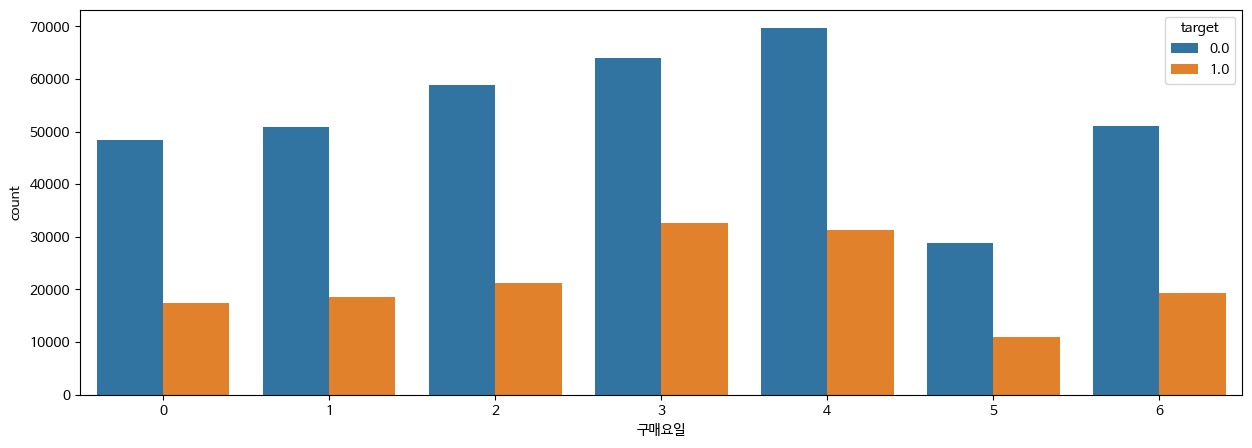

In [ ]:
fig,ax = plt.subplots(figsize = (15,5))
sns.countplot(data = train_trans,x = '구매요일',hue = 'target',ax = ax)
plt.show()

## 방문시간대의 평균
## 방문시간대의 표준편차
## 방문시간대의 비율

In [ ]:
train_trans.head()

,ID,구매일시,지점코드,대분류,중분류,브랜드코드,구매가격,target,구매한_달,구매가격_분리,구매요일
0,train_13219,2004-05-01 09:40:00,A144000,공산품파트,차류,5100,59700,0.0,5,1,5
1,train_5590,2004-05-01 09:40:00,A144000,잡화파트,화장잡화,5101,17000,0.0,5,0,5
2,train_7200,2004-05-01 10:20:00,A112000,공산품,용기보증,5100,34937,0.0,5,1,5
3,train_3010,2004-05-01 10:30:00,A373000,아동_스포츠,아동복,5105,19000,0.0,5,0,5
4,train_10851,2004-05-01 10:30:00,A112000,가정용품,전화기_카세트,5110,215000,0.0,5,2,5


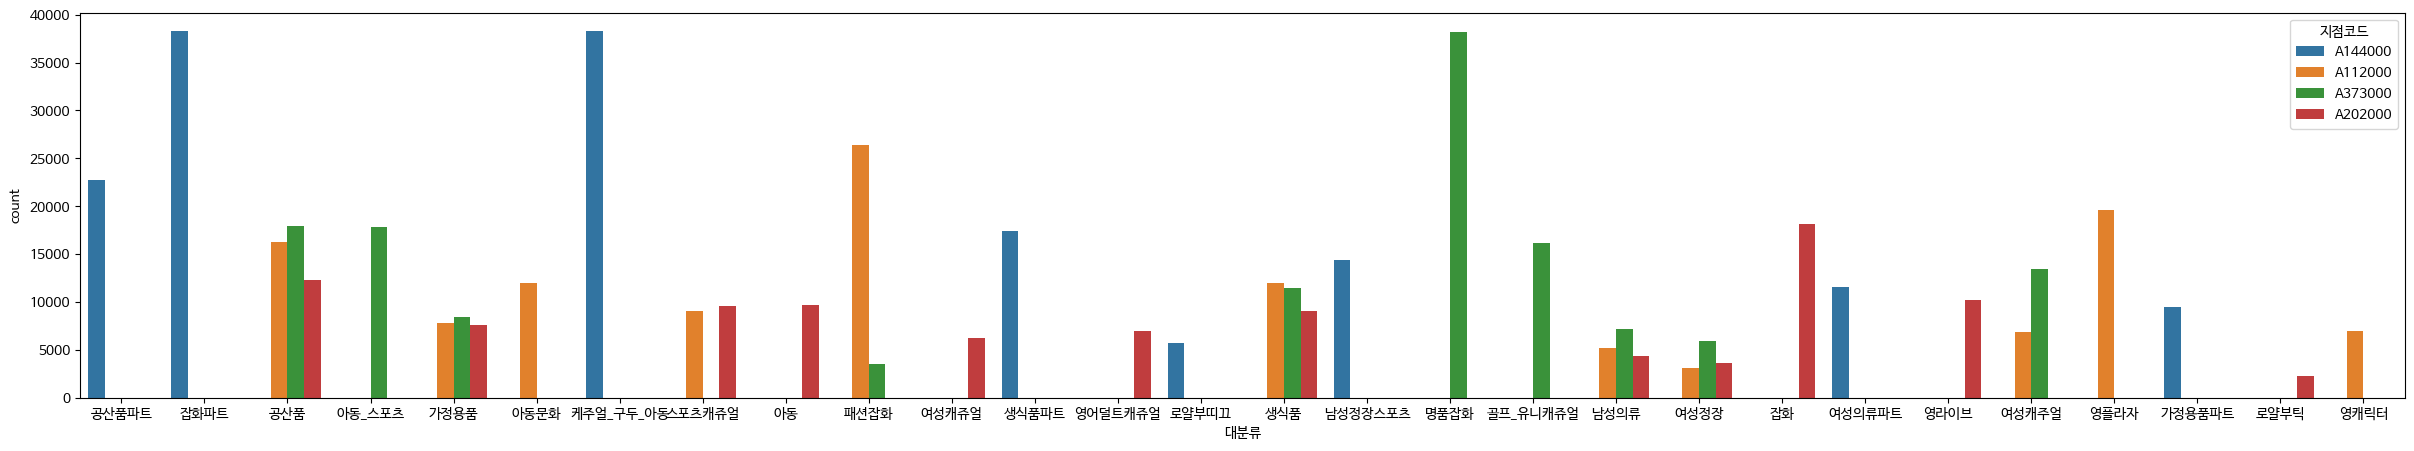

In [ ]:
fig,ax = plt.subplots(figsize = (30,5))
sns.countplot(data = train_trans,x = '대분류',hue = '지점코드',ax = ax)
plt.show()

In [ ]:
train_trans_sorted = train_trans.sort_values(by=['ID','구매일시'])
train_trans_sorted.head()

,ID,구매일시,지점코드,대분류,중분류,브랜드코드,구매가격,target,구매한_달,구매가격_분리,구매요일
11309,train_0,2004-05-07 18:23:00,A112000,패션잡화,양말,5659,43500,1.0,5,1,4
53918,train_0,2004-06-05 12:10:00,A144000,가정용품파트,상품군미지정,5405,1000000,1.0,6,3,5
53956,train_0,2004-06-05 12:20:00,A144000,가정용품파트,상품군미지정,5405,430000,1.0,6,3,5
70074,train_0,2004-06-14 13:50:00,A144000,잡화파트,썬그라스,5578,320000,1.0,6,3,0
141650,train_0,2004-07-29 17:13:00,A112000,패션잡화,싸롱화,5379,165000,1.0,7,2,3


In [ ]:
train_trans['구매시간대'] = train_trans['구매일시'].dt.hour
train_trans.head()

,ID,구매일시,지점코드,대분류,중분류,브랜드코드,구매가격,target,구매한_달,구매가격_분리,구매요일,구매시간대
0,train_13219,2004-05-01 09:40:00,A144000,공산품파트,차류,5100,59700,0.0,5,1,5,9
1,train_5590,2004-05-01 09:40:00,A144000,잡화파트,화장잡화,5101,17000,0.0,5,0,5,9
2,train_7200,2004-05-01 10:20:00,A112000,공산품,용기보증,5100,34937,0.0,5,1,5,10
3,train_3010,2004-05-01 10:30:00,A373000,아동_스포츠,아동복,5105,19000,0.0,5,0,5,10
4,train_10851,2004-05-01 10:30:00,A112000,가정용품,전화기_카세트,5110,215000,0.0,5,2,5,10


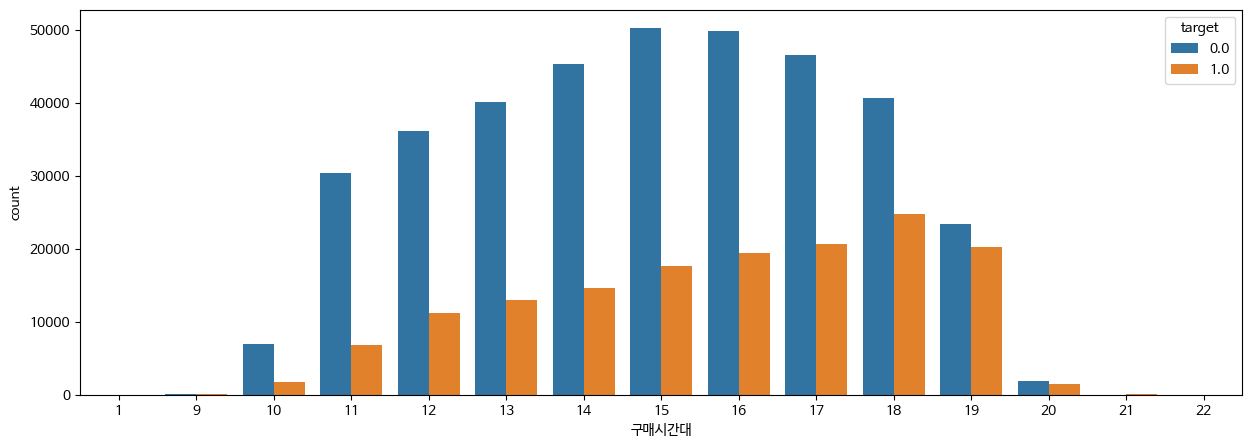

In [ ]:
fig,ax = plt.subplots(figsize = (15,5))
sns.countplot(data = train_trans,x = '구매시간대',hue = 'target',ax = ax)
plt.show()
# 오전 방문 횟수와 아니면 오전 방문 비율을 구해주는 것도 하나의 방법이 될 수 있다.


## 환불비율

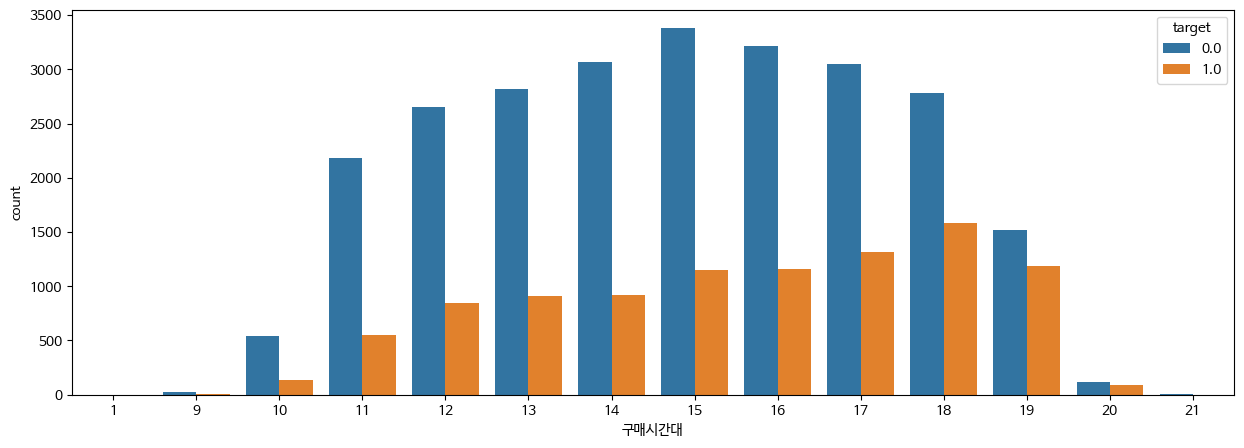

In [ ]:
refund = train_trans[train_trans['구매가격'] < 0]
fig,ax = plt.subplots(figsize = (15,5))
sns.countplot(data = refund,x = '구매시간대',hue = 'target',ax = ax)
plt.show()

In [ ]:
tmp = tmp.fillna(0)
tmp.head()

,ID,구매일시,지점코드,대분류,중분류,브랜드코드,구매가격,target,구매한_달,구매가격_분리
306,train_3067,2004-05-01 13:10:00,A144000,잡화파트,수입의류,5135,386000,0.0,5,3
313,train_6017,2004-05-01 13:10:00,A144000,잡화파트,수입의류,5118,105000,0.0,5,1
384,train_6623,2004-05-01 13:40:00,A144000,잡화파트,수입의류,5492,670000,0.0,5,3
418,train_6623,2004-05-01 13:50:00,A144000,잡화파트,수입의류,5492,300000,0.0,5,3
677,train_10732,2004-05-01 15:30:00,A144000,잡화파트,수입의류,5492,290000,1.0,5,3


ValueError: ignored

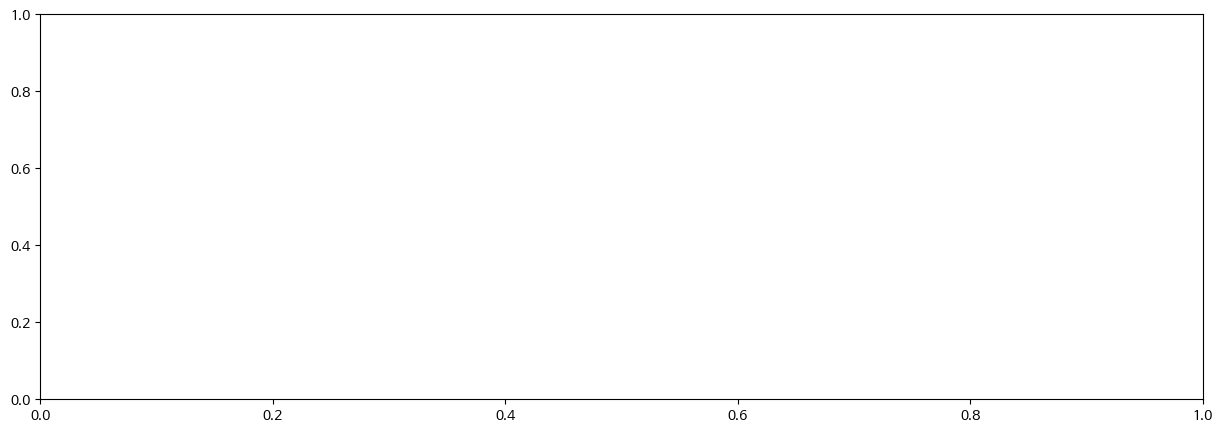

In [ ]:
fig,ax = plt.subplots(figsize = (15,5))
sns.countplot(data = tmp,x = '환불횟수',hue = 'target',ax = ax)
plt.show()

In [ ]:
tmp = refund.groupby('ID')['구매가격'].size().reset_index().rename(columns = {'구매가격':'환불횟수'})
tmp = pd.merge(store_train,tmp,how = 'left',on = 'ID')
fig,ax = plt.subplots(figsize = (15,5))
sns.countplot(data = tmp,x = '환불횟수',hue = 'target',ax = ax)
plt.show()
## 환불 금액의 크기를 하나의 칼럼으로 만드는 것도 도움이 될 듯!
## 환불 횟수가 4회 이상!

## 내점일수의 횟수에 대해서 표로 나타낸다.

In [ ]:
agg_list = [
        # 컬럼명, 집계 방식 튜플
        ('내점일수',lambda x : x.dt.date.nunique() ),
    ]
tmp = train_trans.groupby('ID')["구매일시"].agg(agg_list).reset_index()
tmp = tmp.merge(store_train,how = 'left',on = 'ID')
fig,ax = plt.subplots(figsize = (30,5))
sns.countplot(data = tmp,x = '내점일수',hue = 'target',ax = ax)
plt.show()

In [ ]:
tmp = train_trans[(train_trans['구매시간대'] > 18)]
fig,ax = plt.subplots(figsize = (30,5))
sns.countplot(data = tmp,x = '대분류',hue = 'target',ax = ax)
plt.show()

## 13시 이전에는 모든 물품에 있어서 차이가 발생
## 다만 18시 이후에는 생식품파트, 공산품파트, 생식품, 아동문화에 있어서 크게 차이를 보이고 있는 것이다.
## 구매시간대 <= 12시 에전에는 모든 금액의 합계
## 구매시간대 >18시이면, 남성점장스포츠와, 공산품파트, 생식품파트, 생식품, 로얄부띠끄에서 큰 차이를 보이고 있다.

In [ ]:
tmp = train_trans[(train_trans['구매시간대'] <= 18) & (train_trans['구매시간대'] > 12)]
fig,ax = plt.subplots(figsize = (30,5))
sns.countplot(data = tmp,x = '대분류',hue = 'target',ax = ax)
plt.show()

## 명품잡화, 패션잡화, 영플라자, 영캐릭터의 경우를 제외하면 미혼과 기혼 사이에 큰 폭의 차이가 존재함.

In [ ]:
train_trans.groupby('ID')['대분류'].agg(lambda x : x.nunique())

In [ ]:
train_trans['구매시간대'] = train_trans['구매일시'].dt.hour
train_trans['구매시간대'].head()

0     9
1     9
2    10
3    10
4    10
Name: 구매시간대, dtype: int64

In [ ]:
train_trans = train_trans.merge(store_train,how = 'left',on = 'ID')
train_trans['target']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
523100    1.0
523101    0.0
523102    1.0
523103    0.0
523104    1.0
Name: target, Length: 523105, dtype: float64

In [ ]:
train_trans.pivot_table(index = ['target'],
                        columns = ['지점코드'],
                        values = ['구매시간대'],
                        aggfunc = np.mean).head(10)

구매시간대                                 
지점코드      A112000    A144000    A202000    A373000
target                                            
0.0     14.987230  14.900083  14.983448  14.911562
1.0     16.035813  15.591925  15.711943  15.608000

In [ ]:
train_trans.pivot_table(index = ['target'],
                        columns = ['지점코드'],
                        values = ['구매가격'],
                        aggfunc = np.mean).head(10)

구매가격                                            
지점코드         A112000        A144000       A202000        A373000
target                                                          
0.0     81219.763963  116327.124790  83851.940409  112435.773807
1.0     79859.337580  112335.588526  82525.515023   94834.888697

In [ ]:
train_trans.pivot_table(index = ['target'],
                        columns = ['지점코드'],
                        values = ['구매가격'],
                        aggfunc = np.mean).head(10)

In [ ]:
train_trans.head()

,ID,구매일시,지점코드,대분류,중분류,브랜드코드,구매가격,구매시간대,target
0,train_13219,2004-05-01 09:40:00,A144000,공산품파트,차류,5100,59700,9,0.0
1,train_5590,2004-05-01 09:40:00,A144000,잡화파트,화장잡화,5101,17000,9,0.0
2,train_7200,2004-05-01 10:20:00,A112000,공산품,용기보증,5100,34937,10,0.0
3,train_3010,2004-05-01 10:30:00,A373000,아동_스포츠,아동복,5105,19000,10,0.0
4,train_10851,2004-05-01 10:30:00,A112000,가정용품,전화기_카세트,5110,215000,10,0.0


In [ ]:
brandcode_num = train_trans.groupby(['ID','지점코드'])['브랜드코드'].agg('nunique').reset_index().rename(columns = {'브랜드코드':'브랜드코드_nunique'})
brandcode_num

,ID,지점코드,브랜드코드_nunique
0,train_0,A112000,8
1,train_0,A144000,5
2,train_1,A112000,22
3,train_1,A144000,2
4,train_1,A373000,8


In [ ]:
brandcode_num.pivot_table(index = ['target'],
                        columns = ['지점코드'],
                        values = ['브랜드코드_nunique'],
                        aggfunc = np.mean)

브랜드코드_nunique                                 
지점코드         A112000    A144000    A202000    A373000
target                                               
0.0        13.089274  11.819814  15.045714  10.735116
1.0         9.895269   8.020976  10.897297   8.365747

In [ ]:
tmp.columns

MultiIndex([('mean', '브랜드코드_nunique', 'A112000'),
            ('mean', '브랜드코드_nunique', 'A144000'),
            ('mean', '브랜드코드_nunique', 'A202000'),
            ('mean', '브랜드코드_nunique', 'A373000')],
           names=[None, None, '지점코드'])

In [ ]:
combined_name = ['_'.join(t) for t in tmp.columns]
combined_name

['mean_브랜드코드_nunique_A112000',
 'mean_브랜드코드_nunique_A144000',
 'mean_브랜드코드_nunique_A202000',
 'mean_브랜드코드_nunique_A373000']

In [ ]:
tmp.columns = ['_'.join(t) for t in tmp.columns]

In [ ]:
## 아이디별 브랜드코드_nunique값에 지점별 평균을 pivot table을 이용해서 구현
tmp.reset_index()

ID           sum                        
                  브랜드코드_nunique                        
지점코드                    A112000 A144000 A202000 A373000
0         train_0           8.0     5.0     NaN     NaN
1         train_1          22.0     2.0     NaN     8.0
2        train_10           NaN    23.0     4.0     NaN
3       train_100           4.0    10.0     NaN     5.0
4      train_1000           NaN     3.0     NaN    19.0
...           ...           ...     ...     ...     ...
14935  train_9995           1.0     NaN     NaN     NaN
14936  train_9996           1.0    16.0     NaN     NaN
14937  train_9997          16.0     NaN     NaN     NaN
14938  train_9998          13.0     NaN     NaN     5.0
14939  train_9999          27.0     NaN     NaN     NaN

[14940 rows x 5 columns]

In [ ]:
tmp = brandcode_num.pivot_table(index = ['ID'],
                        columns = ['지점코드'],
                        values = ['브랜드코드_nunique'],
                        aggfunc = ['sum'])

In [ ]:
## 지점코드별로 구매가격대의 평균
train_trans.pivot_table(index = ['target'],
                        columns = ['지점코드'],
                        values = ['구매가격'],
                        aggfunc = ['mean'])

mean                                            
                구매가격                                            
지점코드         A112000        A144000       A202000        A373000
target                                                          
0.0     81219.763963  116327.124790  83851.940409  112435.773807
1.0     79859.337580  112335.588526  82525.515023   94834.888697

In [ ]:
train_trans.groupby(['ID','지점코드','대분류'])['구매가격'].agg('mean').reset_index()

,ID,지점코드,대분류,구매가격
0,train_0,A112000,가정용품,127000.000000
1,train_0,A112000,생식품,340000.000000
2,train_0,A112000,스포츠캐쥬얼,114000.000000
3,train_0,A112000,아동문화,157300.000000
4,train_0,A112000,패션잡화,125833.333333
...,...,...,...,...
104364,train_9999,A112000,스포츠캐쥬얼,66500.000000
104365,train_9999,A112000,여성캐주얼,67700.000000
104366,train_9999,A112000,영캐릭터,81000.000000
104367,train_9999,A112000,영플라자,49666.666667


In [ ]:
tmp = train_trans.pivot_table(index = ['ID'],
                        columns = ['지점코드','대분류'],
                        values = ['구매가격'],
                        aggfunc = ['mean']).reset_index().fillna(0)

In [ ]:
combined_name = ['_'.join(t) for t in tmp.columns]

In [ ]:
tmp.columns = combined_name

In [ ]:
tmp

,ID___,mean_구매가격_A112000_가정용품,mean_구매가격_A112000_공산품,mean_구매가격_A112000_남성의류,mean_구매가격_A112000_생식품,mean_구매가격_A112000_스포츠캐쥬얼,mean_구매가격_A112000_아동문화,mean_구매가격_A112000_여성정장,mean_구매가격_A112000_여성캐주얼,mean_구매가격_A112000_영캐릭터,...,mean_구매가격_A373000_가정용품,mean_구매가격_A373000_골프_유니캐쥬얼,mean_구매가격_A373000_공산품,mean_구매가격_A373000_남성의류,mean_구매가격_A373000_명품잡화,mean_구매가격_A373000_생식품,mean_구매가격_A373000_아동_스포츠,mean_구매가격_A373000_여성정장,mean_구매가격_A373000_여성캐주얼,mean_구매가격_A373000_패션잡화
0,train_0,127000.000000,0.0,0.0,340000.0,114000.0,157300.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,train_1,0.000000,21125.0,0.0,12150.0,188000.0,0.000000,0.0,288500.0,172250.0,...,0.0,84950.0,10062.5,0.0,193500.0,0.0,0.0,37000.000000,103250.000000,0.0
2,train_10,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
3,train_100,353500.000000,0.0,0.0,0.0,108000.0,0.000000,0.0,0.0,0.0,...,0.0,47800.0,0.0,0.0,0.0,10767.0,65000.0,0.000000,0.000000,0.0
4,train_1000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,29000.0,0.0,5800.0,34400.0,0.0,0.0,16055.555556,6941.666667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14935,train_9995,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
14936,train_9996,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
14937,train_9997,0.000000,8200.0,0.0,0.0,0.0,35250.000000,0.0,8000.0,108500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
14938,train_9998,0.000000,27914.0,0.0,19295.5,107800.0,114636.666667,0.0,24000.0,0.0,...,0.0,29500.0,0.0,0.0,76000.0,0.0,0.0,0.000000,0.000000,0.0


In [ ]:
train_trans.pivot_table(index = ['target'],
                                columns = ['지점코드',],
                                values = ['브랜드코드_nunique'],
                                aggfunc = np.mean)

In [ ]:
tmp = train_trans.pivot_table(index = ['target'],
                        columns = ['지점코드','구매시간대'],
                        values = ['구매가격'],
                        aggfunc = np.mean)

In [ ]:
tmp.columns = [col1 + "_" + col2 + '_' + str(col3) for col1,col2,col3 in tmp.columns]

In [ ]:
tmp.reset_index()

,target,구매가격_A112000_9,구매가격_A112000_10,구매가격_A112000_11,구매가격_A112000_12,구매가격_A112000_13,구매가격_A112000_14,구매가격_A112000_15,구매가격_A112000_16,구매가격_A112000_17,...,구매가격_A373000_12,구매가격_A373000_13,구매가격_A373000_14,구매가격_A373000_15,구매가격_A373000_16,구매가격_A373000_17,구매가격_A373000_18,구매가격_A373000_19,구매가격_A373000_20,구매가격_A373000_21
0,0.0,95254.843750,66975.655128,78114.089460,78995.009199,76911.351435,87784.892232,81018.033321,82024.119306,79659.691951,...,109398.90384,113480.612309,111339.422751,120768.312717,120245.963025,112507.509518,102504.678959,107191.275187,127867.477974,77946.153846
1,1.0,117660.416667,72816.371084,78404.929287,73976.748277,79297.264543,80217.901432,85165.452504,80197.923866,80408.681226,...,84245.18654,91768.028896,98837.142447,94813.812101,104216.355122,101475.795048,93401.171727,88843.232382,90370.646914,54641.081081


In [ ]:
tmp = train_trans.pivot_table(index = ['ID'],
                        columns = ['지점코드','구매시간대'],
                        values = ['구매가격'],
                        aggfunc = np.mean)

tmp.fillna(0,inplace=True)

tmp.columns = [col1 + "_" + col2 + '_' + str(col3) for col1,col2,col3 in tmp.columns]

tmp = tmp.reset_index()

tmp

,ID,구매가격_A112000_9,구매가격_A112000_10,구매가격_A112000_11,구매가격_A112000_12,구매가격_A112000_13,구매가격_A112000_14,구매가격_A112000_15,구매가격_A112000_16,구매가격_A112000_17,...,구매가격_A373000_12,구매가격_A373000_13,구매가격_A373000_14,구매가격_A373000_15,구매가격_A373000_16,구매가격_A373000_17,구매가격_A373000_18,구매가격_A373000_19,구매가격_A373000_20,구매가격_A373000_21
0,train_0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,189333.333333,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,train_1,0.0,0.0,0.0,159283.333333,120600.0,130250.000000,0.0,290666.666667,70416.666667,...,105000.000000,66833.333333,0.0,0.000000,0.0,158500.0,91750.000000,14525.0,0.0,0.0
2,train_10,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
3,train_100,0.0,0.0,15000.0,0.000000,59000.0,0.000000,0.0,271666.666667,0.000000,...,-29077.666667,65000.000000,0.0,128500.000000,108000.0,0.0,0.000000,19800.0,0.0,0.0
4,train_1000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,2800.000000,-13262.500000,-10900.0,90916.666667,47180.0,0.0,13333.333333,108000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14935,train_9995,0.0,0.0,0.0,0.000000,0.0,36000.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
14936,train_9996,0.0,0.0,0.0,0.000000,192000.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
14937,train_9997,0.0,0.0,0.0,0.000000,0.0,32500.000000,-19000.0,-1600.000000,-1662.500000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
14938,train_9998,0.0,0.0,66500.0,86200.000000,13520.0,0.000000,164000.0,77111.111111,102416.000000,...,0.000000,24000.000000,76000.0,0.000000,35000.0,0.0,0.000000,0.0,0.0,0.0


In [ ]:
test_trans['구매시간대'] = test_trans['구매일시'].dt.hour

In [ ]:
tmp = test_trans.pivot_table(index = ['ID'],
                        columns = ['지점코드','구매시간대'],
                        values = ['구매가격'],
                        aggfunc = np.mean)

tmp.fillna(0,inplace=True)

tmp.columns = [col1 + "_" + col2 + '_' + str(col3) for col1,col2,col3 in tmp.columns]

tmp = tmp.reset_index()

tmp

,ID,구매가격_A112000_0,구매가격_A112000_1,구매가격_A112000_9,구매가격_A112000_10,구매가격_A112000_11,구매가격_A112000_12,구매가격_A112000_13,구매가격_A112000_14,구매가격_A112000_15,...,구매가격_A373000_13,구매가격_A373000_14,구매가격_A373000_15,구매가격_A373000_16,구매가격_A373000_17,구매가격_A373000_18,구매가격_A373000_19,구매가격_A373000_20,구매가격_A373000_21,구매가격_A373000_23
0,test_0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,test_1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,37600.0,118000.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,test_10,0.0,0.0,0.0,0.0,0.0,91000.000000,0.0,0.000000,50150.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,test_100,0.0,0.0,0.0,19431.0,7369.0,8754.666667,38045.0,30226.571429,14663.666667,...,0.0,0.0,13675.0,37000.000000,0.0,0.0,4200.0,44000.0,0.0,0.0
4,test_1000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,73000.0,77000.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12220,test_9995,0.0,0.0,0.0,41800.0,-89000.0,30000.000000,-15750.0,51950.000000,98700.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
12221,test_9996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
12222,test_9997,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,50162.5,0.0,117250.0,16666.666667,41325.0,122000.0,65600.0,0.0,0.0,0.0
12223,test_9998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_trans.head()

,ID,구매일시,지점코드,대분류,중분류,브랜드코드,구매가격,구매시간대,target
0,train_13219,2004-05-01 09:40:00,A144000,공산품파트,차류,5100,59700,9,0.0
1,train_5590,2004-05-01 09:40:00,A144000,잡화파트,화장잡화,5101,17000,9,0.0
2,train_7200,2004-05-01 10:20:00,A112000,공산품,용기보증,5100,34937,10,0.0
3,train_3010,2004-05-01 10:30:00,A373000,아동_스포츠,아동복,5105,19000,10,0.0
4,train_10851,2004-05-01 10:30:00,A112000,가정용품,전화기_카세트,5110,215000,10,0.0


In [ ]:
conditions = [
    (train_trans['구매시간대'] < 9) | (train_trans['구매시간대'] > 17),
    ((train_trans['구매시간대'] >= 9) & (train_trans['구매시간대'] <= 17)),
    ]
구매시간대_분류 = ['근무시간대x', '근무시간대']

train_trans['구매시간대_분리'] = np.select(conditions, 구매시간대_분류, default='Other')

train_trans.head()

,ID,구매일시,지점코드,대분류,중분류,브랜드코드,구매가격,구매시간대,target,구매시간대_분리
0,train_13219,2004-05-01 09:40:00,A144000,공산품파트,차류,5100,59700,9,0.0,근무시간대
1,train_5590,2004-05-01 09:40:00,A144000,잡화파트,화장잡화,5101,17000,9,0.0,근무시간대
2,train_7200,2004-05-01 10:20:00,A112000,공산품,용기보증,5100,34937,10,0.0,근무시간대
3,train_3010,2004-05-01 10:30:00,A373000,아동_스포츠,아동복,5105,19000,10,0.0,근무시간대
4,train_10851,2004-05-01 10:30:00,A112000,가정용품,전화기_카세트,5110,215000,10,0.0,근무시간대


In [ ]:
tmp = train_trans.pivot_table(index = ['target'],
                                columns = ['지점코드','구매시간대_분리'],
                                values = ['구매가격'],
                                aggfunc = np.sum)

tmp.columns = [col1 + "_" + col2 + '_' + col3 for col1,col2,col3 in tmp.columns]

tmp = tmp.reset_index()

tmp

,target,구매가격_A112000_근무시간대,구매가격_A112000_근무시간대x,구매가격_A144000_근무시간대,구매가격_A144000_근무시간대x,구매가격_A202000_근무시간대,구매가격_A202000_근무시간대x,구매가격_A373000_근무시간대,구매가격_A373000_근무시간대x
0,0.0,5188773032,1311569557,11589241437,2329182717,5265609323,1081898714,9106127483,1709294471
1,1.0,2339263072,1270938002,3118771412,1177278500,1436199056,546889070,3023313686,1154257996


In [ ]:
tmp = train_trans.pivot_table(index = ['ID'],
                                columns = ['지점코드','구매시간대_분리'],
                                values = ['구매가격'],
                                aggfunc = np.sum)

tmp.columns = [col1 + "_" + col2 + '_' + col3 for col1,col2,col3 in tmp.columns]

tmp = tmp.reset_index()

tmp.fillna(0,inplace = True)

tmp

In [ ]:
conditions = [
    (test_trans['구매시간대'] < 9) | (test_trans['구매시간대'] > 17),
    ((test_trans['구매시간대'] >= 9) & (test_trans['구매시간대'] <= 17)),
    ]
구매시간대_분류 = ['근무시간대x', '근무시간대']

test_trans['구매시간대_분리'] = np.select(conditions, 구매시간대_분류, default='Other')

tmp = test_trans.pivot_table(index = ['ID'],
                                columns = ['지점코드','구매시간대_분리'],
                                values = ['구매가격'],
                                aggfunc = np.sum)

tmp.columns = [col1 + "_" + col2 + '_' + col3 for col1,col2,col3 in tmp.columns]

tmp = tmp.reset_index()

tmp.fillna(0,inplace = True)

tmp

,ID,구매가격_A112000_근무시간대,구매가격_A112000_근무시간대x,구매가격_A144000_근무시간대,구매가격_A144000_근무시간대x,구매가격_A202000_근무시간대,구매가격_A202000_근무시간대x,구매가격_A373000_근무시간대,구매가격_A373000_근무시간대x
0,test_0,0.0,0.0,0.0,0.0,429579.0,0.0,0.0,0.0
1,test_1,62000.0,0.0,0.0,0.0,0.0,0.0,228600.0,0.0
2,test_10,701888.0,1563900.0,0.0,0.0,0.0,0.0,0.0,0.0
3,test_100,1457659.0,906182.0,350000.0,0.0,0.0,0.0,64350.0,48200.0
4,test_1000,0.0,0.0,0.0,0.0,0.0,0.0,227000.0,0.0
...,...,...,...,...,...,...,...,...,...
12220,test_9995,338800.0,722328.0,0.0,0.0,0.0,0.0,0.0,0.0
12221,test_9996,0.0,0.0,0.0,0.0,1584893.0,40000.0,0.0,0.0
12222,test_9997,0.0,0.0,0.0,0.0,0.0,0.0,1016400.0,619200.0
12223,test_9998,0.0,0.0,0.0,0.0,5477872.0,1253000.0,0.0,0.0


In [ ]:
train_trans['구매하는_달'] = train_trans['구매일시'].dt.month
train_trans[train_trans['중분류'].str.contains('아동|유아')]

,ID,구매일시,지점코드,대분류,중분류,브랜드코드,구매가격,구매시간대,target,구매시간대_분리,구매하는_달
3,train_3010,2004-05-01 10:30:00,A373000,아동_스포츠,아동복,5105,19000,10,0.0,근무시간대,5
10,train_7200,2004-05-01 10:40:00,A112000,아동문화,아동,5122,26000,10,0.0,근무시간대,5
16,train_11577,2004-05-01 10:42:00,A202000,아동,아동복,5115,104500,10,1.0,근무시간대,5
27,train_9190,2004-05-01 10:53:00,A373000,아동_스포츠,아동복,5105,298000,10,0.0,근무시간대,5
35,train_2935,2004-05-01 11:00:00,A202000,아동,아동복,5155,39000,11,1.0,근무시간대,5
...,...,...,...,...,...,...,...,...,...,...,...
522866,train_3792,2005-04-29 18:12:00,A202000,아동,아동복,5213,80000,18,1.0,근무시간대x,4
522869,train_406,2005-04-29 18:13:00,A202000,아동,유아복,5668,20000,18,1.0,근무시간대x,4
522906,train_9111,2005-04-29 18:30:00,A373000,아동_스포츠,아동복,5115,13000,18,0.0,근무시간대x,4
522988,train_5052,2005-04-29 19:00:00,A144000,케주얼_구두_아동,아동,6627,180000,19,1.0,근무시간대x,4


In [ ]:
import seaborn as sns

In [ ]:
train_trans['대분류'].unique()

array(['공산품파트', '잡화파트', '공산품', '아동_스포츠', '가정용품', '아동문화', '케주얼_구두_아동',
       '스포츠캐쥬얼', '아동', '패션잡화', '여성캐쥬얼', '생식품파트', '영어덜트캐쥬얼', '로얄부띠끄',
       '생식품', '남성정장스포츠', '명품잡화', '골프_유니캐쥬얼', '남성의류', '여성정장', '잡화',
       '여성의류파트', '영라이브', '여성캐주얼', '영플라자', '가정용품파트', '로얄부틱', '영캐릭터'],
      dtype=object)

<Axes: xlabel='구매하는_달', ylabel='count'>

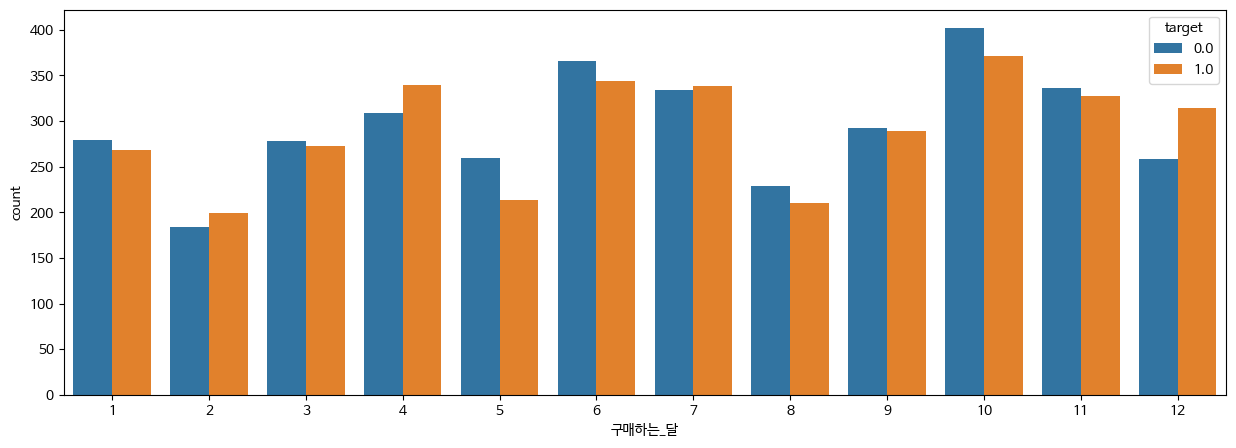

In [ ]:
tmp = train_trans[train_trans['대분류'].isin(['영캐릭터'])]
fig,ax = plt.subplots(figsize = (15,5))
sns.countplot(data = tmp,x = '구매하는_달',hue = 'target')

In [ ]:
tmp = train_trans[train_trans['대분류'].isin(['영캐릭터','영플라자'])]
tmp

,ID,구매일시,지점코드,대분류,중분류,브랜드코드,구매가격,구매시간대,target,구매시간대_분리,구매하는_달
160,train_10065,2004-05-01 12:03:00,A112000,영플라자,영캐주얼,5302,109000,12,1.0,근무시간대,5
162,train_6222,2004-05-01 12:03:00,A112000,영플라자,진캐주얼,5305,21000,12,0.0,근무시간대,5
186,train_769,2004-05-01 12:12:00,A112000,영플라자,진캐주얼,5331,19800,12,0.0,근무시간대,5
188,train_4207,2004-05-01 12:13:00,A112000,영플라자,영캐주얼,5334,64000,12,0.0,근무시간대,5
215,train_769,2004-05-01 12:30:00,A112000,영플라자,패션란제리,5202,25000,12,0.0,근무시간대,5
...,...,...,...,...,...,...,...,...,...,...,...
523063,train_330,2005-04-29 19:23:00,A112000,영캐릭터,영커리어캐주얼,5437,224000,19,1.0,근무시간대x,4
523068,train_7786,2005-04-29 19:23:00,A112000,영캐릭터,트렌드캐주얼,5431,185000,19,0.0,근무시간대x,4
523089,train_1076,2005-04-29 19:40:00,A112000,영플라자,스포츠캐주얼,5235,25000,19,0.0,근무시간대x,4
523100,train_330,2005-04-29 19:53:00,A112000,영캐릭터,트렌드캐주얼,5882,484000,19,1.0,근무시간대x,4


In [ ]:
len(tmp) /len(train_trans) # 영플라자/영캐릭터는 전체 구매 수준에서 0.0508정도 밖에 차지하지 않음

0.050869328337523056

In [ ]:
train_trans[train_trans['ID'] == 'train_9999']

,ID,구매일시,지점코드,대분류,중분류,브랜드코드,구매가격,구매시간대,target,구매시간대_분리,구매하는_달
18190,train_9999,2004-05-12 15:30:00,A112000,여성캐주얼,칼라드래디셔널,5248,99500,15,0.0,근무시간대,5
87460,train_9999,2004-06-25 14:10:00,A112000,패션잡화,선글라스,5578,50000,14,0.0,근무시간대,6
91648,train_9999,2004-06-29 11:40:00,A112000,패션잡화,선글라스,5578,-50000,11,0.0,근무시간대,6
132084,train_9999,2004-07-22 15:00:00,A112000,남성의류,어덜트,5560,95000,15,0.0,근무시간대,7
141187,train_9999,2004-07-29 14:23:00,A112000,패션잡화,시계,5809,39000,14,0.0,근무시간대,7
157143,train_9999,2004-08-13 14:50:00,A112000,가정용품,주방용품,6120,-176000,14,0.0,근무시간대,8
157152,train_9999,2004-08-13 14:53:00,A112000,가정용품,주방용품,6120,176000,14,0.0,근무시간대,8
157153,train_9999,2004-08-13 14:53:00,A112000,가정용품,주방용품,5514,228000,14,0.0,근무시간대,8
187542,train_9999,2004-09-04 15:33:00,A112000,가정용품,주방용품,6120,265000,15,0.0,근무시간대,9
187543,train_9999,2004-09-04 15:33:00,A112000,가정용품,주방용품,5514,-228000,15,0.0,근무시간대,9


In [ ]:
train_trans.groupby('ID')['대분류'].agg(lambda x : np.mean(x.isin(['영플라자','영캐릭터']))>0.0508).astype(int).reset_index().rename(columns = {'대분류':'영플라자_영캐리턱_구매력'})

,ID,영플라자_영캐리턱_구매력
0,train_0,0
1,train_1,1
2,train_10,0
3,train_100,1
4,train_1000,0
...,...,...
14935,train_9995,0
14936,train_9996,0
14937,train_9997,1
14938,train_9998,0


<Axes: xlabel='구매시간대', ylabel='구매가격'>

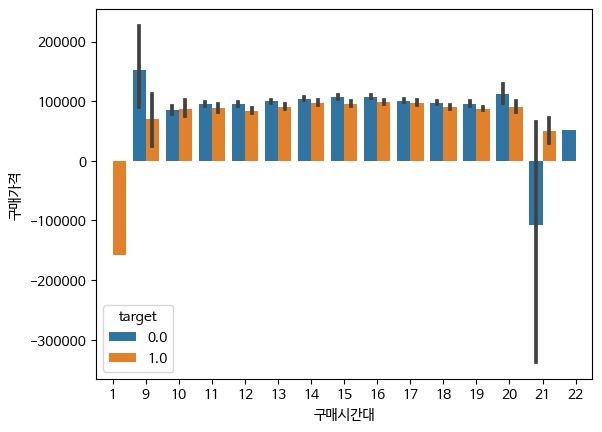

In [ ]:
sns.barplot(data = train_trans,x = '구매시간대',y = '구매가격',hue = 'target')

In [ ]:
tmp = train_trans.pivot_table(index = ['ID'],
                                columns = ['지점코드','구매시간대_분리'],
                                values = ['구매가격'],
                                aggfunc = np.sum)

tmp.columns = [col1 + "_" + col2 + '_' + col3 for col1,col2,col3 in tmp.columns]

tmp = tmp.reset_index()

tmp.fillna(0,inplace = True)

tmp

,ID,구매가격_A112000_근무시간대,구매가격_A112000_근무시간대x,구매가격_A144000_근무시간대,구매가격_A144000_근무시간대x,구매가격_A202000_근무시간대,구매가격_A202000_근무시간대x,구매가격_A373000_근무시간대,구매가격_A373000_근무시간대x
0,train_0,568000.0,674800.0,2958400.0,0.0,0.0,0.0,0.0,0.0
1,train_1,3162950.0,1009150.0,50400.0,0.0,0.0,0.0,622500.0,198025.0
2,train_10,0.0,0.0,7294669.0,2712102.0,1189189.0,38910.0,0.0,0.0
3,train_100,919000.0,0.0,745520.0,-151200.0,0.0,0.0,342767.0,19800.0
4,train_1000,0.0,0.0,130000.0,25200.0,0.0,0.0,454300.0,148000.0
...,...,...,...,...,...,...,...,...,...
14935,train_9995,36000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14936,train_9996,192000.0,0.0,4358410.0,224000.0,0.0,0.0,0.0,0.0
14937,train_9997,-4600.0,800300.0,0.0,0.0,0.0,0.0,0.0,0.0
14938,train_9998,1520084.0,262241.0,0.0,0.0,0.0,0.0,287000.0,0.0


In [ ]:
combined_name = ['_'.join(t) for t in tmp.columns]
combined_name

Index(['ID', '구매일시', '지점코드', '대분류', '중분류', '브랜드코드', '구매가격', '구매시간대', 'target',
       '구매시간대_분리', '구매하는_달'],
      dtype='object')

In [ ]:
tpm = train_trans.pivot_table(index = ['ID'],
                                columns = ['중분류'],
                                values = ['구매가격'],
                                aggfunc = np.sum)
tmp

,level_0,index,I_D,구_매_일_시,지_점_코_드,대_분_류,중_분_류,브_랜_드_코_드,구_매_가_격,구_매_시_간_대,t_a_r_g_e_t,구_매_시_간_대___분_리,구_매_하_는___달
0,0,160,train_10065,2004-05-01 12:03:00,A112000,영플라자,영캐주얼,5302,109000,12,1.0,근무시간대,5
1,1,162,train_6222,2004-05-01 12:03:00,A112000,영플라자,진캐주얼,5305,21000,12,0.0,근무시간대,5
2,2,186,train_769,2004-05-01 12:12:00,A112000,영플라자,진캐주얼,5331,19800,12,0.0,근무시간대,5
3,3,188,train_4207,2004-05-01 12:13:00,A112000,영플라자,영캐주얼,5334,64000,12,0.0,근무시간대,5
4,4,215,train_769,2004-05-01 12:30:00,A112000,영플라자,패션란제리,5202,25000,12,0.0,근무시간대,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26605,26605,523063,train_330,2005-04-29 19:23:00,A112000,영캐릭터,영커리어캐주얼,5437,224000,19,1.0,근무시간대x,4
26606,26606,523068,train_7786,2005-04-29 19:23:00,A112000,영캐릭터,트렌드캐주얼,5431,185000,19,0.0,근무시간대x,4
26607,26607,523089,train_1076,2005-04-29 19:40:00,A112000,영플라자,스포츠캐주얼,5235,25000,19,0.0,근무시간대x,4
26608,26608,523100,train_330,2005-04-29 19:53:00,A112000,영캐릭터,트렌드캐주얼,5882,484000,19,1.0,근무시간대x,4


In [ ]:
tmp.columns

MultiIndex([(  'ID',        ''),
            ('구매가격',   'DC캐주얼'),
            ('구매가격', 'GBR  지원'),
            ('구매가격',   'L_B침구'),
            ('구매가격',    'NB제화'),
            ('구매가격',   'NB핸드백'),
            ('구매가격',   'N_B침구'),
            ('구매가격', 'TOP디자이너'),
            ('구매가격',  'TV.VTR'),
            ('구매가격',  'TV_VCR'),
            ...
            ('구매가격',    '행사슈즈'),
            ('구매가격',   '행사핸드백'),
            ('구매가격',      '향수'),
            ('구매가격',   '헤어ACC'),
            ('구매가격',  '헤어악세사리'),
            ('구매가격',  '헤어액세사리'),
            ('구매가격',     '홈데코'),
            ('구매가격',    '화장잡화'),
            ('구매가격',     '화장품'),
            ('구매가격',   '훼미닌부틱')],
           names=[None, '중분류'], length=304)

In [ ]:
tmp = train_trans.pivot_table(index = ['ID'],
                                columns = ['중분류'],
                                values = ['구매가격'],
                                aggfunc = np.sum)
tmp = tmp.reset_index()
tmp.fillna(0,inplace = True)
tmp.columns = ['_'.join(t) for t in tmp.columns]
tmp.rename(columns = {'ID_':'ID'},inplace = True)
tmp

train_ft = pd.merge(train_ft,tmp,how = 'left',on = 'ID')
train_ft.head()

,ID,target,구매가격_DC캐주얼,구매가격_GBR 지원,구매가격_L_B침구,구매가격_NB제화,구매가격_NB핸드백,구매가격_N_B침구,구매가격_TOP디자이너,구매가격_TV.VTR,...,구매가격_행사슈즈,구매가격_행사핸드백,구매가격_향수,구매가격_헤어ACC,구매가격_헤어악세사리,구매가격_헤어액세사리,구매가격_홈데코,구매가격_화장잡화,구매가격_화장품,구매가격_훼미닌부틱
0,train_0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,train_1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,train_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,train_3,0.0,1406000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,310000.0,0.0,0.0,0.0,49000.0,0.0,0.0
4,train_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_trans

,ID,구매일시,지점코드,대분류,중분류,브랜드코드,구매가격,구매시간대,구매시간대_분리
0,test_3366,2004-05-01 10:20:00,A373000,생식품,건식품,5100,7000,10,근무시간대
1,test_9389,2004-05-01 10:23:00,A373000,명품잡화,스타킹,5104,46000,10,근무시간대
2,test_8190,2004-05-01 10:30:00,A144000,잡화파트,수입종합화장품,5106,260000,10,근무시간대
3,test_8835,2004-05-01 10:30:00,A144000,잡화파트,준보석,5107,17000,10,근무시간대
4,test_1167,2004-05-01 10:30:00,A373000,남성의류,셔츠,5108,138000,10,근무시간대
...,...,...,...,...,...,...,...,...,...
441191,test_10274,2005-04-29 19:53:00,A112000,패션잡화,수입종합화장품,5149,73000,19,근무시간대x
441192,test_8294,2005-04-29 19:53:00,A112000,여성캐주얼,칼라드래디셔널,6939,188000,19,근무시간대x
441193,test_10919,2005-04-29 19:53:00,A112000,영플라자,스포츠캐주얼,5429,39000,19,근무시간대x
441194,test_808,2005-04-29 19:53:00,A112000,남성의류,셔츠,5651,160000,19,근무시간대x


In [ ]:
tmp = test_trans.pivot_table(index = ['ID'],
                                columns = ['중분류'],
                                values = ['구매가격'],
                                aggfunc = np.sum,
                                fill_value=0)
tmp = tmp.reset_index()
tmp.fillna(0,inplace = True)
tmp.columns = ['_'.join(t) for t in tmp.columns]
tmp.rename(columns = {'ID_':'ID'},inplace = True)
tmp

test_ft = pd.merge(test_ft,tmp,how = 'left',on = 'ID')
test_ft.head()

,ID,구매가격_DC캐주얼,구매가격_GBR 지원,구매가격_L_B침구,구매가격_NB제화,구매가격_NB핸드백,구매가격_N_B침구,구매가격_TOP디자이너,구매가격_TV.VTR,구매가격_TV_VCR,...,구매가격_행사슈즈,구매가격_행사핸드백,구매가격_향수,구매가격_헤어ACC,구매가격_헤어악세사리,구매가격_헤어액세사리,구매가격_홈데코,구매가격_화장잡화,구매가격_화장품,구매가격_훼미닌부틱
0,test_0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,test_1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,test_2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,test_3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,test_4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_ft.shape,test_ft.shape

((14940, 2), (12225, 303))

In [ ]:
columns_df1 = set(train_ft.columns)
columns_df2 = set(test_ft.columns)

missing_columns_df1 = columns_df2 - columns_df1
missing_columns_df2 = columns_df1 - columns_df2

print("첫 번째 데이터 프레임에만 있는 열:", missing_columns_df1)
print("두 번째 데이터 프레임에만 있는 열:", missing_columns_df2)

첫 번째 데이터 프레임에만 있는 열: set()
두 번째 데이터 프레임에만 있는 열: {'target', '구매가격_특판'}


In [ ]:
train_ft.shape,test_ft.shape

((14940, 2), (12225, 1))

In [ ]:
train_ft = store_train.copy()
test_ft = store_submission.iloc[:,:1].copy()

In [ ]:
train_trans[train_trans['중분류'] == '특판']

,ID,구매일시,지점코드,대분류,중분류,브랜드코드,구매가격,구매시간대,target,구매시간대_분리,구매하는_달
514033,train_1650,2005-04-23 11:00:00,A373000,가정용품,특판,5707,84000,11,0.0,근무시간대,4


In [ ]:
test_trans[test_trans['중분류'] == '특판']

,ID,구매일시,지점코드,대분류,중분류,브랜드코드,구매가격,구매시간대,구매시간대_분리


In [ ]:
tmp = train_trans.pivot_table(index = ['ID'],
                                columns = ['대분류'],
                                values = ['구매가격'],
                                aggfunc = np.sum)
tmp = tmp.reset_index()
tmp.fillna(0,inplace = True)
tmp.columns = ['_'.join(t) for t in tmp.columns]
tmp.rename(columns = {'ID_':'ID'},inplace = True)
tmp

train_ft = pd.merge(train_ft,tmp,how = 'left',on = 'ID')

NameError: ignored

In [ ]:
train_ft.shape

(14940, 30)

In [ ]:
tmp = test_trans.pivot_table(index = ['ID'],
                                columns = ['대분류'],
                                values = ['구매가격'],
                                aggfunc = np.sum)
tmp = tmp.reset_index()
tmp.fillna(0,inplace = True)
tmp.columns = ['_'.join(t) for t in tmp.columns]
tmp.rename(columns = {'ID_':'ID'},inplace = True)
tmp

test_ft = pd.merge(test_ft,tmp,how = 'left',on = 'ID')

In [ ]:
test_ft.shape

(12225, 29)

In [36]:
tmp = pd.crosstab(train_trans['target'],train_trans['대분류'],normalize = 'columns').reset_index()
tmp

대분류,target,가정용품,가정용품파트,골프_유니캐쥬얼,공산품,공산품파트,남성의류,남성정장스포츠,로얄부띠끄,로얄부틱,...,여성캐주얼,여성캐쥬얼,영라이브,영어덜트캐쥬얼,영캐릭터,영플라자,잡화,잡화파트,케주얼_구두_아동,패션잡화
0,0.0,0.750336,0.803176,0.740873,0.743556,0.820313,0.693449,0.798279,0.82396,0.851418,...,0.630082,0.721145,0.703314,0.682124,0.502709,0.499235,0.662742,0.671855,0.723685,0.540978
1,1.0,0.249664,0.196824,0.259127,0.256444,0.179687,0.306551,0.201721,0.17604,0.148582,...,0.369918,0.278855,0.296686,0.317876,0.497291,0.500765,0.337258,0.328145,0.276315,0.459022
